In [1]:
import tensorflow as tf
import helper_functions as h

## Old
$ \boldsymbol{X} = \begin{bmatrix} \boldsymbol x^1 & \boldsymbol{x}^2 & \dots & \boldsymbol x^m \end{bmatrix}  $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,m)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,1)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 & y^2 & \dots & y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,m)}$ 

$ \boldsymbol \omega = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ \vdots \\ w_d \end{bmatrix},\qquad b $
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,1)}$
$,\qquad b \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,)}$ 

$ \boldsymbol{z} = \boldsymbol{\omega^T X}+b 
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(1,m)=(1,d)\times(d,m)} $
<br>
$ \boldsymbol{z} = \begin{bmatrix} z^1 & z^2 & \dots & z^m \end{bmatrix}  $ 

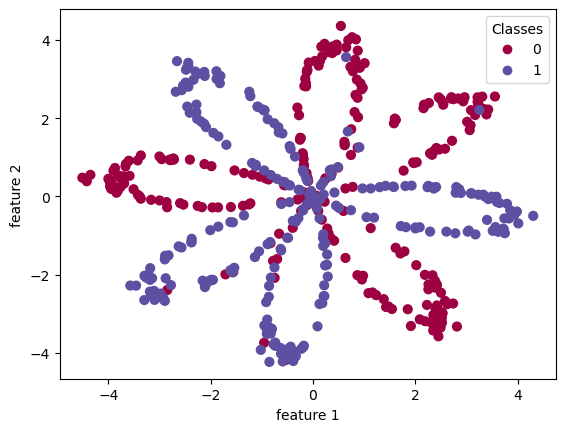

In [2]:
X_np, Y_np = h.load_flower_dataset(num_samples=500, petals=4)
h.plot_scatter(X_np, Y_np)

In [3]:
X = tf.convert_to_tensor(X_np, dtype=tf.float32)    # (d,m)=(2,500)
Y = tf.convert_to_tensor(Y_np, dtype=tf.float32)    # (1,m)=(1,500)

In [4]:
%reset_selective -f ^(?!X$|Y$|tf$|k$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize parameters with zeros
w = tf.Variable(tf.zeros(shape=(X.shape[0],1)))     # shape=(d,1)=(500,1)
b = tf.Variable( [0.0] )                            # shape=(1)

## epochs loop
for i in range(num_epochs): 
    ## forward pass
    with tf.GradientTape() as tape:
        z = tf.matmul(tf.transpose(w), X) + b
        Y_pred = tf.sigmoid(z)
        cost = tf.keras.losses.binary_crossentropy(Y, Y_pred, from_logits=False)
    
    ## backward pass: gradients finding
    grads = tape.gradient(cost, [w, b])
    ## update parameters
    w.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])

    ## Record the costs
    if i % 10 == 0 or i == num_epochs-1:
        costs.append(cost.numpy().item())
        ## Binary Accuracy
        Y_pred_out = tf.cast(Y_pred > 0.5, tf.float32)
        acc = tf.reduce_mean( tf.cast(Y_pred_out == Y, tf.float32) )
        train_acc.append(acc.numpy().item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.numpy().item()}")

## Predict train/test set examples
z = tf.matmul(tf.transpose(w), X) + b    # shape(1,m) --> (1,d)X(d,m); EagerTensor float32
Y_pred = tf.sigmoid(z)                          # shape(1,m); EagerTensor float32
Y_pred_out = tf.cast(Y_pred > 0.5, "float32")   # shape(1,m); EagerTensor float32

## Print train/test Errors
if print_cost:
    acc = tf.reduce_mean( tf.cast(Y_pred_out == Y, tf.float32) )
    print(f"train accuracy: { acc.numpy().item() *100 } %")

Cost in epochs 1, 0.6931469440460205
Cost in epochs 11, 0.6901383996009827
Cost in epochs 21, 0.6874319911003113
Cost in epochs 31, 0.6849938035011292
Cost in epochs 41, 0.6827933192253113
Cost in epochs 51, 0.6808163523674011
Cost in epochs 61, 0.6790358424186707
Cost in epochs 71, 0.6774247884750366
Cost in epochs 81, 0.6759788393974304
Cost in epochs 91, 0.6746716499328613
Cost in epochs 100, 0.6736012101173401
train accuracy: 47.40000069141388 %


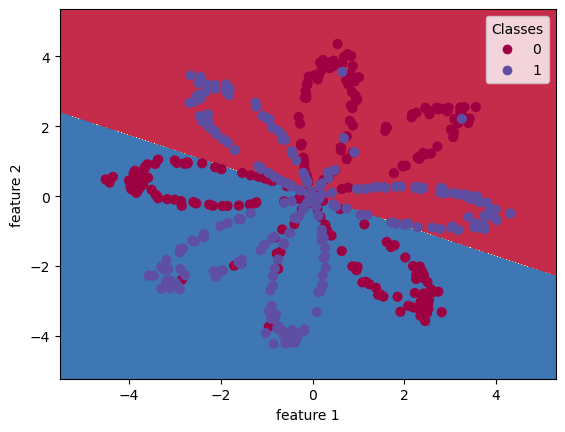

In [5]:
h.plot_decision_boundary(w.numpy(), b.numpy(), X.numpy(), Y.numpy())